In [418]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt

In [419]:
path_data = "..\\data\\NOMAL.xlsx"
raw_df = pd.read_excel(path_data)

In [420]:
raw_df.head(5)

,Codice identificativo:,Sesso,Nazionalità,Età,Domicilio,Comorbilità,Diabete,HIV,Cirrosi,IRC,Ritardo terapeutico,Malaria grave,GCS,Seizures,Prostrazione,Shock,Bleeding,ARDS,Anemia,Creatinina,Glicemia,Acidosi,Bilirubina,Hyperparasitaemia,Numero criteri,Malaria Complicata,Quali criteri di malaria complicata sono presenti? [Ipotensione (PAS < 90mmHg nell’adulto)],"Quali criteri di malaria complicata sono presenti? [Sanguinamento spontaneo (sanguinamento minore, macroemoglobinuria)]",Quali criteri di malaria complicata sono presenti? [Insufficienza respiratoria sO2 20/min],Quali criteri di malaria complicata sono presenti? [Interessamento d’organo (es. polmonite)],Quali criteri di malaria complicata sono presenti? [Anemia Hb < 10 g/dl],Quali criteri di malaria complicata sono presenti? [Creatinina ≥ 2mg/dl],Quali criteri di malaria complicata sono presenti? [Oliguria (< a 600ml/24 ore)],Quali criteri di malaria complicata sono presenti? [Bilirubina totale≥ 2mg/dl],Quali criteri di malaria complicata sono presenti? [PT% ≤ 50%],Quali criteri di malaria complicata sono presenti? [Ast/alt > 3 VN],Quali criteri di malaria complicata sono presenti? [Parassitemia periferica ≥ 2%],RDT,Emoscopia,NAAT,Falciparum,Ovale,Parassitemia valore assoluto,Percentuale parassitemia,Pregressa malaria,Sub-Saharan Africa,Profilassi,PA sistolica,PA diastolica,FC,FR,Altezza,Peso,Temperatura,QTc ingresso,QTc dopo ACT,QTC dopo ultima somministrazione artesunato *,T0. [GB (in cell/ul):],T0. [GR (in cell/ul):],T0. [Hb (in g/dl):],T0. [PLT (in cell/ul):],T0. [Glicemia (in mg/dl):],T0. [Azotemia (in mg/dl):],T0. [Creatinina (in mg/dl):],T0. [LDH (in U/L):],T0. [AST (in U/L):],T0. [ALT (in U/L):],T0. [Bilirubina tot (in mg/dl):],T0. [Bilirubina diretta (in mg/dl):],T0. [Sodio (in mEq/l):],T0. [Potassio (in mEq/l):],T0. [Ca (in mg/dl):],T0. [INR:],T0. [fibrinogeno (in mg/dl):],T0. [pH:],T0. [bicarbonati (in mmol/l):],T0. [Lattati # (in mmol/l):],T1. [Goccia spessa e striscio periferico:],T1. [TC (temperatura corporea) in °C:],T2. [Goccia spessa e striscio periferico:],T2. [TC (temperatura corporea) in °C:],T3. [Goccia spessa e striscio periferico:],T3. [TC (temperatura corporea) in °C:],T7. [Goccia spessa e striscio periferico:],T7. [TC (temperatura corporea) in °C:],Artesunato ev: Somministrazione [1][Data inizio e ora],Artemether/ Lumefantrina: Somministrazione [1][Data inizio e ora],Diidroartemisinina/Piperachina: Somministrazione [1][Data inizio e ora],ACT,Artesunato + ACT,Atovaquone/Proguanile,Doxiciclina per os,Clindamicina,Antibiotici,Chinino,Primachina,Durata Artesunato,Permanenza in Terapia Intensiva (giorni):,Trasferimento in Rianimazione (anche in altro centro)?,Guarigione,Unnamed: 100,Durata ricovero,Decesso.,ICU,Eventuali sequele:,"PADH, post-artesunate delayed haemoly1s)",Insorgenza PADH,Si prega di fornire tutti i parameri vitali. [GB (in cell/ul):],Si prega di fornire tutti i parameri vitali. [Hb (in g/dl):],Si prega di fornire tutti i parameri vitali. [PLT (in cell/ul):],Si prega di fornire tutti i parameri vitali. [reticoliti (in cell/ul):],Si prega di fornire tutti i parameri vitali. [LDH (in U/l)lcio:],Si prega di fornire tutti i parameri vitali. [AST (U/L):],Si prega di fornire tutti i parameri vitali. [ALT (U/L):],Si prega di fornire tutti i parameri vitali. [Bilirubina tot (mg/dl):],Si prega di fornire tutti i parameri vitali. [Bilirubina diretta (mg/dl):],Si prega di fornire tutti i parameri vitali. [aptoglobina (in mg/dl):],Si prega di fornire tutti i parameri vitali. [test di Coombs diretto:],Si prega di fornire tutti i parameri vitali. [test di coombs indiretto:],Vuole riportare ulteriori informazioni relative ai prelievi effettuati durante le visite intermedie fino alla risoluzione dell’emolisi?,Nadir Hb,Trasfusione:,Unità trasfuse,Altri eventi avversi,Diarrea e disidratazione,Ipertransaminasemia tardiva,Polmonite,IVU nosocomiale,Esofagite,Dispepsia,Tachiaritmia sopraventricolare
0,3761,1,1,57,0.0,0,0,0,0,0,7.0,1,0,0,1,0,0,0,0,0,0,0.0,0,

**Data Cleaning**

Remove columns for which each row have the same value.

In [421]:
# Remove features with constant values
noInfo_columns = raw_df.columns[raw_df.nunique() <= 1] # columns with no values or with only the same value

filtered_df = raw_df.loc[:, raw_df.nunique() > 1] # this operation also removes the empty columns


# Print the removed columns
print("Removed columns:")
for column in noInfo_columns :
    print(column)

Removed columns:
Cirrosi
Malaria grave
Seizures
Malaria Complicata
Quali criteri di malaria complicata sono presenti? [Ipotensione (PAS < 90mmHg nell’adulto)]
Quali criteri di malaria complicata sono presenti? [Sanguinamento spontaneo (sanguinamento minore, macroemoglobinuria)]
Quali criteri di malaria complicata sono presenti? [Insufficienza respiratoria sO2 20/min]
Quali criteri di malaria complicata sono presenti? [Interessamento d’organo (es. polmonite)]
Quali criteri di malaria complicata sono presenti? [Anemia Hb < 10 g/dl]
Quali criteri di malaria complicata sono presenti? [Creatinina ≥ 2mg/dl]
Quali criteri di malaria complicata sono presenti? [Oliguria (< a 600ml/24 ore)]
Quali criteri di malaria complicata sono presenti? [Bilirubina  totale≥ 2mg/dl]
Quali criteri di malaria complicata sono presenti? [PT%  ≤ 50%]
Quali criteri di malaria complicata sono presenti? [Ast/alt  > 3 VN]
Quali criteri di malaria complicata sono presenti? [Parassitemia periferica ≥ 2%]
RDT
Sub-Saharan

/!\ RDT has missing values but all the values are the same /!\

/!\ Need to see with Tomasso /!\

In [422]:
filtered_df.head(5)

,Codice identificativo:,Sesso,Nazionalità,Età,Domicilio,Comorbilità,Diabete,HIV,IRC,Ritardo terapeutico,GCS,Prostrazione,Shock,Bleeding,ARDS,Anemia,Creatinina,Glicemia,Acidosi,Bilirubina,Hyperparasitaemia,Numero criteri,Emoscopia,NAAT,Falciparum,Ovale,Parassitemia valore assoluto,Percentuale parassitemia,Pregressa malaria,Profilassi,PA sistolica,PA diastolica,FC,FR,Altezza,Peso,Temperatura,QTc ingresso,QTc dopo ACT,QTC dopo ultima somministrazione artesunato *,T0. [GB (in cell/ul):],T0. [GR (in cell/ul):],T0. [Hb (in g/dl):],T0. [PLT (in cell/ul):],T0. [Glicemia (in mg/dl):],T0. [Azotemia (in mg/dl):],T0. [Creatinina (in mg/dl):],T0. [LDH (in U/L):],T0. [AST (in U/L):],T0. [ALT (in U/L):],T0. [Bilirubina tot (in mg/dl):],T0. [Bilirubina diretta (in mg/dl):],T0. [Sodio (in mEq/l):],T0. [Potassio (in mEq/l):],T0. [Ca (in mg/dl):],T0. [INR:],T0. [fibrinogeno (in mg/dl):],T0. [pH:],T0. [bicarbonati (in mmol/l):],T0. [Lattati # (in mmol/l):],T1. [Goccia spessa e striscio periferico:],T1. [TC (temperatura corporea) in °C:],T2. [Goccia spessa e striscio periferico:],T2. [TC (temperatura corporea) in °C:],T3. [Goccia spessa e striscio periferico:],T3. [TC (temperatura corporea) in °C:],T7. [Goccia spessa e striscio periferico:],T7. [TC (temperatura corporea) in °C:],Artesunato ev: Somministrazione [1][Data inizio e ora],Artemether/ Lumefantrina: Somministrazione [1][Data inizio e ora],Diidroartemisinina/Piperachina: Somministrazione [1][Data inizio e ora],ACT,Artesunato + ACT,Atovaquone/Proguanile,Doxiciclina per os,Clindamicina,Antibiotici,Chinino,Primachina,Durata Artesunato,Permanenza in Terapia Intensiva (giorni):,Trasferimento in Rianimazione (anche in altro centro)?,Guarigione,Durata ricovero,Decesso.,ICU,Eventuali sequele:,"PADH, post-artesunate delayed haemoly1s)",Insorgenza PADH,Si prega di fornire tutti i parameri vitali. [GB (in cell/ul):],Si prega di fornire tutti i parameri vitali. [Hb (in g/dl):],Si prega di fornire tutti i parameri vitali. [PLT (in cell/ul):],Si prega di fornire tutti i parameri vitali. [reticoliti (in cell/ul):],Si prega di fornire tutti i parameri vitali. [LDH (in U/l)lcio:],Si prega di fornire tutti i parameri vitali. [AST (U/L):],Si prega di fornire tutti i parameri vitali. [ALT (U/L):],Si prega di fornire tutti i parameri vitali. [Bilirubina tot (mg/dl):],Si prega di fornire tutti i parameri vitali. [Bilirubina diretta (mg/dl):],Si prega di fornire tutti i parameri vitali. [test di Coombs diretto:],Vuole riportare ulteriori informazioni relative ai prelievi effettuati durante le visite intermedie fino alla risoluzione dell’emolisi?,Nadir Hb,Trasfusione:,Unità trasfuse,Altri eventi avversi,Diarrea e disidratazione,Ipertransaminasemia tardiva,Polmonite,IVU nosocomiale,Esofagite,Dispepsia,Tachiaritmia sopraventricolare
0,3761,1,1,57,0.0,0,0,0,0,7.0,0,1,0,0,0,0,0,0,0.0,0,0,1,1.0,NaN,1,0.0,NaN,1.0,0,0,110.0,60.0,65.0,14.0,160.0,55.0,37.8,NaN,NaN,NaN,4890.0,4210000.0,11.4,132000.0,99.0,29.0,0.94,338.0,31.0,33.0,1.08,NaN,136.0,3.4,8.40,1.15,NaN,NaN,NaN,NaN,NaN,36.8,NaN,36.8,1.0,36.9,NaN,NaN,0,0,0.0,0.0,0.0,1,0,0.0,0,0,0.0,NaN,0.0,0.0,1.0,4.0,0.0,0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,35319,0,0,62,0.0,0,0,0,0,7.0,0,1,0,0,0,0,0,0,0.0,0,0,1,1.0,NaN,1,0.0,NaN,1.0,0,0,140.0,90.0,124.0,14.0,159.0,70.0,38.5,NaN,NaN,NaN,5240.0,4980000.0,14.2,165000.0,104.0,40.0,1.00,260.0,31.0,39.0,0.82,NaN,140.0,3.9,9.40,1.19,NaN,NaN,NaN,NaN,NaN,37.5,NaN,NaN,1.0,37.2,NaN,NaN,0,0,0.0,0.0,0.0,1,0,0.0,0,0,0.0,NaN,0.0,0.0,1.0,NaN,0.0,0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,BS01,1,0,72,0.0,1,0,0,0,2.0,0,0,1,0,0,0,0,0,0.0,0,0,1,1.0,1.0,1,0.0,7.0,0.2,1,0,80.0,60.0,87.0,NaN,175.0,83.0,39.0,NaN,NaN,NaN,6000.0,3010000.0,9.4,123000.0,107.0,38.0,0.91,474.0,18.0,18.0,1.75,0.36,139.0,4.0,8.13,1.10,369.0,7.41,30.4,2.6,1.0,37.5,1.0,37.3,0.0,37.0,NaN,37.0,1,0,1.0,1.0,1.0,0,0,0.0,0,0,0.0,1.0,0.0,0.0,1.0,5.0,0.0,0,0.0,0.

In [423]:
filtered_df.columns

Index(['Codice identificativo:', 'Sesso', 'Nazionalità', 'Età', 'Domicilio',
       'Comorbilità', 'Diabete', 'HIV', 'IRC', 'Ritardo terapeutico',
       ...
       'Trasfusione:', 'Unità trasfuse', 'Altri eventi avversi',
       'Diarrea e disidratazione', 'Ipertransaminasemia tardiva', 'Polmonite',
       'IVU nosocomiale', 'Esofagite', 'Dispepsia',
       'Tachiaritmia sopraventricolare'],
      dtype='object', length=111)

In [424]:
# Set display options to show all columns
pd.set_option('display.max_columns', None)

# Display the head of the dataframe with all columns
filtered_df.head()

,Codice identificativo:,Sesso,Nazionalità,Età,Domicilio,Comorbilità,Diabete,HIV,IRC,Ritardo terapeutico,GCS,Prostrazione,Shock,Bleeding,ARDS,Anemia,Creatinina,Glicemia,Acidosi,Bilirubina,Hyperparasitaemia,Numero criteri,Emoscopia,NAAT,Falciparum,Ovale,Parassitemia valore assoluto,Percentuale parassitemia,Pregressa malaria,Profilassi,PA sistolica,PA diastolica,FC,FR,Altezza,Peso,Temperatura,QTc ingresso,QTc dopo ACT,QTC dopo ultima somministrazione artesunato *,T0. [GB (in cell/ul):],T0. [GR (in cell/ul):],T0. [Hb (in g/dl):],T0. [PLT (in cell/ul):],T0. [Glicemia (in mg/dl):],T0. [Azotemia (in mg/dl):],T0. [Creatinina (in mg/dl):],T0. [LDH (in U/L):],T0. [AST (in U/L):],T0. [ALT (in U/L):],T0. [Bilirubina tot (in mg/dl):],T0. [Bilirubina diretta (in mg/dl):],T0. [Sodio (in mEq/l):],T0. [Potassio (in mEq/l):],T0. [Ca (in mg/dl):],T0. [INR:],T0. [fibrinogeno (in mg/dl):],T0. [pH:],T0. [bicarbonati (in mmol/l):],T0. [Lattati # (in mmol/l):],T1. [Goccia spessa e striscio periferico:],T1. [TC (temperatura corporea) in °C:],T2. [Goccia spessa e striscio periferico:],T2. [TC (temperatura corporea) in °C:],T3. [Goccia spessa e striscio periferico:],T3. [TC (temperatura corporea) in °C:],T7. [Goccia spessa e striscio periferico:],T7. [TC (temperatura corporea) in °C:],Artesunato ev: Somministrazione [1][Data inizio e ora],Artemether/ Lumefantrina: Somministrazione [1][Data inizio e ora],Diidroartemisinina/Piperachina: Somministrazione [1][Data inizio e ora],ACT,Artesunato + ACT,Atovaquone/Proguanile,Doxiciclina per os,Clindamicina,Antibiotici,Chinino,Primachina,Durata Artesunato,Permanenza in Terapia Intensiva (giorni):,Trasferimento in Rianimazione (anche in altro centro)?,Guarigione,Durata ricovero,Decesso.,ICU,Eventuali sequele:,"PADH, post-artesunate delayed haemoly1s)",Insorgenza PADH,Si prega di fornire tutti i parameri vitali. [GB (in cell/ul):],Si prega di fornire tutti i parameri vitali. [Hb (in g/dl):],Si prega di fornire tutti i parameri vitali. [PLT (in cell/ul):],Si prega di fornire tutti i parameri vitali. [reticoliti (in cell/ul):],Si prega di fornire tutti i parameri vitali. [LDH (in U/l)lcio:],Si prega di fornire tutti i parameri vitali. [AST (U/L):],Si prega di fornire tutti i parameri vitali. [ALT (U/L):],Si prega di fornire tutti i parameri vitali. [Bilirubina tot (mg/dl):],Si prega di fornire tutti i parameri vitali. [Bilirubina diretta (mg/dl):],Si prega di fornire tutti i parameri vitali. [test di Coombs diretto:],Vuole riportare ulteriori informazioni relative ai prelievi effettuati durante le visite intermedie fino alla risoluzione dell’emolisi?,Nadir Hb,Trasfusione:,Unità trasfuse,Altri eventi avversi,Diarrea e disidratazione,Ipertransaminasemia tardiva,Polmonite,IVU nosocomiale,Esofagite,Dispepsia,Tachiaritmia sopraventricolare
0,3761,1,1,57,0.0,0,0,0,0,7.0,0,1,0,0,0,0,0,0,0.0,0,0,1,1.0,NaN,1,0.0,NaN,1.0,0,0,110.0,60.0,65.0,14.0,160.0,55.0,37.8,NaN,NaN,NaN,4890.0,4210000.0,11.4,132000.0,99.0,29.0,0.94,338.0,31.0,33.0,1.08,NaN,136.0,3.4,8.40,1.15,NaN,NaN,NaN,NaN,NaN,36.8,NaN,36.8,1.0,36.9,NaN,NaN,0,0,0.0,0.0,0.0,1,0,0.0,0,0,0.0,NaN,0.0,0.0,1.0,4.0,0.0,0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,35319,0,0,62,0.0,0,0,0,0,7.0,0,1,0,0,0,0,0,0,0.0,0,0,1,1.0,NaN,1,0.0,NaN,1.0,0,0,140.0,90.0,124.0,14.0,159.0,70.0,38.5,NaN,NaN,NaN,5240.0,4980000.0,14.2,165000.0,104.0,40.0,1.00,260.0,31.0,39.0,0.82,NaN,140.0,3.9,9.40,1.19,NaN,NaN,NaN,NaN,NaN,37.5,NaN,NaN,1.0,37.2,NaN,NaN,0,0,0.0,0.0,0.0,1,0,0.0,0,0,0.0,NaN,0.0,0.0,1.0,NaN,0.0,0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,BS01,1,0,72,0.0,1,0,0,0,2.0,0,0,1,0,0,0,0,0,0.0,0,0,1,1.0,1.0,1,0.0,7.0,0.2,1,0,80.0,60.0,87.0,NaN,175.0,83.0,39.0,NaN,NaN,NaN,6000.0,3010000.0,9.4,123000.0,107.0,38.0,0.91,474.0,18.0,18.0,1.75,0.36,139.0,4.0,8.13,1.10,369.0,7.41,30.4,2.6,1.0,37.5,1.0,37.3,0.0,37.0,NaN,37.0,1,0,1.0,1.0,1.0,0,0,0.0,0,0,0.0,1.0,0.0,0.0,1.0,5.0,0.0,0,0.0,0.

Special caracters will be a problem for the future as the following example shows. Let's remove them. 

In [425]:
if "T0. [GB (in cell/ul):]" in filtered_df.columns : 
    print("yes")

In [426]:
import re

# Function to remove special characters from a string
def remove_special_characters(string):
    return re.sub(r'\W+', '', string)

# Rename the features in filtered_df
filtered_df.rename(columns=lambda x: remove_special_characters(x), inplace=True)


c:\Users\balth\anaconda3\lib\site-packages\pandas\core\frame.py:5039: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [427]:
# Defining the categories for data

patient_general = ["Codice identificativo:", 'Sesso', 'Nazionalità', 'Età', 'Domicilio','Altezza','Peso', 'Sub-Saharan Africa', 'Pregressa malaria', 'Profilassi']
comorbidities = ['Comorbilità', 'Diabete', 'HIV', 'Cirrosi', 'IRC']
patient_state_arrival = ['GCS', 'Seizures', 'Prostrazione', 'Shock', 'Bleeding', 'ARDS', 'Anemia', 'Creatinina', 'Glicemia', 'Acidosi', 'Bilirubina', 'Hyperparasitaemia', 'Numero criteri']
diagnosis_type = ['RDT', 'Emoscopia', 'NAAT']
diagnosis_result = ['Falciparum', 'Ovale', 'Parassitemia valore assoluto', 'Percentuale parassitemia']
baseline_other = ['PA sistolica', 'PA diastolica', 'FC', 'FR', 'Temperatura', 'Ritardo terapeutico']
QTc = ['QTc ingresso', 'QTc dopo ACT', 'QTC dopo ultima somministrazione artesunato *']
T0 =  ["T0. [GB (in cell/ul):]", "T0. [GR (in cell/ul):]", "T0. [Hb (in g/dl):]", "T0. [PLT (in cell/ul):]", "T0. [Glicemia (in mg/dl):]", "T0. [Azotemia (in mg/dl):]", "T0. [Creatinina (in mg/dl):]", "T0. [LDH (in U/L):]", "T0. [AST (in U/L):]", "T0. [ALT (in U/L):]", "T0. [Bilirubina tot (in mg/dl):]", "T0. [Bilirubina diretta (in mg/dl):]", "T0. [Sodio (in mEq/l):]", "T0. [Potassio (in mEq/l):]", "T0. [Ca (in mg/dl):]", "T0. [INR:]", "T0. [fibrinogeno (in mg/dl):]", "T0. [pH:]", "T0. [bicarbonati (in mmol/l):]", "T0. [Lattati # (in mmol/l):"]
T1 = ["T1. [Goccia spessa e striscio periferico:]", "T1. [TC (temperatura corporea) in °C:]"]
T2 = ["T2. [Goccia spessa e striscio periferico:]", "T2. [TC (temperatura corporea) in °C:]"]
T3 = ["T3. [Goccia spessa e striscio periferico:]", "T3. [TC (temperatura corporea) in °C:]"]
T7 = [ "T7. [Goccia spessa e striscio periferico:]","T7. [TC (temperatura corporea) in °C:]"]
treatment = ["Artesunato ev: Somministrazione [1][Data inizio e ora]", "Artemether/ Lumefantrina: Somministrazione [1][Data inizio e ora]", "Diidroartemisinina/Piperachina: Somministrazione [1][Data inizio e ora]", "ACT", "Artesunato + ACT", "Atovaquone/Proguanile", "Doxiciclina per os", "Clindamicina", "Antibiotici", "Chinino", "Primachina", "Durata Artesunato", "Permanenza in Terapia Intensiva (giorni):", "Trasferimento in Rianimazione (anche in altro centro)?", "Guarigione"]
outcome = ["Durata ricovero", "Decesso.", "ICU", "Eventuali sequele:", "PADH, post-artesunate delayed haemoly1s", "Insorgenza PADH"]
PADH_info = ["Insorgenza PADH", "Si prega di fornire tutti i parameri vitali. [GB (in cell/ul):]", "Si prega di fornire tutti i parameri vitali. [Hb (in g/dl):]", "Si prega di fornire tutti i parameri vitali. [PLT (in cell/ul):]", "Si prega di fornire tutti i parameri vitali. [reticoliti (in cell/ul):]", "Si prega di fornire tutti i parameri vitali. [LDH (in U/l)lcio:]", "Si prega di fornire tutti i parameri vitali. [AST (U/L):]", "Si prega di fornire tutti i parameri vitali. [ALT (U/L):]", "Si prega di fornire tutti i parameri vitali. [Bilirubina tot (mg/dl):]", "Si prega di fornire tutti i parameri vitali. [Bilirubina diretta (mg/dl):]", "Si prega di fornire tutti i parameri vitali. [aptoglobina (in mg/dl):]", "Si prega di fornire tutti i parameri vitali. [test di Coombs diretto:]", "Si prega di fornire tutti i parameri vitali. [test di coombs indiretto:]", "Vuole riportare ulteriori informazioni relative ai prelievi effettuati durante le visite intermedie fino alla risoluzione dell’emolisi?", "Nadir Hb", "Trasfusione:", "Unità trasfuse"]
follow_up = ["Altri eventi avversi", "Diarrea e disidratazione", "Ipertransaminasemia tardiva", "Polmonite", "IVU nosocomiale", "Esofagite", "Dispepsia", "Tachiaritmia sopraventricolare"]

In [428]:
# Removing special caracters from the category description

import re

# Function to remove special characters from a string
def remove_special_characters(string):
    return re.sub(r'\W+', '', string)

# Update the list of features for each category
patient_general = [remove_special_characters(feature) for feature in patient_general]
comorbidities = [remove_special_characters(feature) for feature in comorbidities]
patient_state_arrival = [remove_special_characters(feature) for feature in patient_state_arrival]
diagnosis_type = [remove_special_characters(feature) for feature in diagnosis_type]
diagnosis_result = [remove_special_characters(feature) for feature in diagnosis_result]
baseline_other = [remove_special_characters(feature) for feature in baseline_other]
QTc = [remove_special_characters(feature) for feature in QTc]
T0 = [remove_special_characters(feature) for feature in T0]
T1 = [remove_special_characters(feature) for feature in T1]
T2 = [remove_special_characters(feature) for feature in T2]
T3 = [remove_special_characters(feature) for feature in T3]
T7 = [remove_special_characters(feature) for feature in T7]
treatment = [remove_special_characters(feature) for feature in treatment]
outcome = [remove_special_characters(feature) for feature in outcome]
PADH_info = [remove_special_characters(feature) for feature in PADH_info]
follow_up = [remove_special_characters(feature) for feature in follow_up]

In [429]:
# To test 
print(T2)

['T2Gocciaspessaestriscioperiferico', 'T2TCtemperaturacorporeainC']


In [430]:
import re

# Define the categories
categories = [patient_general, comorbidities, patient_state_arrival, diagnosis_type, diagnosis_result, baseline_other, QTc, T0, T1, T2, T3, T7, treatment, outcome, PADH_info, follow_up]

# Check if features belong to a category (partial match)
missing_features = []
for column in filtered_df.columns:
    matched = False
    for category in categories:
        for feature in category:
            if re.search(re.escape(feature), column, re.IGNORECASE):
                matched = True
                break
        if matched:
            break
    if not matched:
        missing_features.append(column)

# Print the missing features
if missing_features:
    print("Features not belonging to any category:")
    for feature in missing_features:
        print(feature)
else:
    print("All features belong to a category.")


All features belong to a category.


In [431]:

# Check if noInfo_columns are present in categories and remove them
removed_features = []
for column in noInfo_columns:
    for i, category in enumerate(categories):
        if column in category:
            categories[i].remove(column)
            removed_features.append(column)
            break

# Print the removed features
if removed_features:
    print("Removed features from categories:")
    for feature in removed_features:
        print(feature)
else:
    print("No features were removed from categories.")


Removed features from categories:
Cirrosi
Seizures
RDT


In [432]:
patient_general # Should not have the 'Sub-Saharan Africa' column for example

['Codiceidentificativo',
 'Sesso',
 'Nazionalità',
 'Età',
 'Domicilio',
 'Altezza',
 'Peso',
 'SubSaharanAfrica',
 'Pregressamalaria',
 'Profilassi']

In [433]:
# import matplotlib.pyplot as plt
# import numpy as np
# from matplotlib import colors

# # Define the category lists
# categories = [patient_general, comorbidities, patient_state_arrival, diagnosis_type, diagnosis_result, baseline_other, QTc, T0, T1, T2, T3, T7, treatment, outcome, PADH_info, follow_up]
# category_names = ['Patient General', 'Comorbidities', 'Patient State Arrival', 'Diagnosis Type', 'Diagnosis Result', 'Baseline Other', 'QTc', 'T0', 'T1', 'T2', 'T3', 'T7', 'Treatment', 'Outcome', 'PADH Info', 'Follow-up']

# # Get the 'ICU' column from filtered_df
# target_column = filtered_df['ICU']

# # Iterate over each category
# for category, category_name in zip(categories, category_names):
#     # Filter the features based on the current category
#     features = [feature for feature in filtered_df.columns if feature in category]

#     # Calculate the correlation between each feature and ICU
#     correlations = []
#     for feature in features:
#         if filtered_df[feature].dtype != np.object:  # Check if the feature is not a string
#             correlation = filtered_df[feature].corr(target_column)
#             correlations.append((feature, correlation))

#     # Sort the correlation values in ascending order
#     correlations.sort(key=lambda x: x[1])

#     # Prepare colors for the bars based on correlation values
#     cmap = colors.LinearSegmentedColormap.from_list('correlation_cmap', ['green', 'white', 'red'])
#     norm = colors.Normalize(vmin=-1, vmax=1)

#     # Plot the correlation values on a bar chart with colored bars
#     plt.figure(figsize=(10, 6))
#     features, correlation_values = zip(*correlations)
#     bar_colors = cmap(norm(correlation_values))
#     plt.bar(features, correlation_values, color=bar_colors)
#     plt.xlabel('Features')
#     plt.ylabel('Correlation with ICU')
#     plt.title(f'Correlation between Features in {category_name} and ICU')
#     plt.xticks(rotation=90)
#     plt.gca().set_xticklabels([label[:10] for label in features])  # Display only the first 10 characters of the labels
#     plt.tight_layout()
#     plt.show()


**Data Filling**

In [434]:
import numpy as np

# Create a new dataframe to store the results
feature_info = pd.DataFrame(columns=['feature', 'type', 'mean', 'variance'])

# Iterate over the columns in the filtered dataframe
for column in filtered_df.columns:
    col_data = filtered_df[column]
    col_type = ''
    col_mean = ''
    col_var_entropy = ''
    
    # Check if the column has string values
    if col_data.dtype == object:
        col_type = 'string'
    elif set(col_data.dropna().unique()) == {0, 1}:
        col_type = 'categorical'
        col_mean = col_data.mean()
        # col_var_entropy = np.nans
    elif col_data.dtype == np.int64 or all(pd.isnull(val) or val.is_integer() for val in col_data.dropna().unique()):
        col_type = 'int'
        col_mean = col_data.mean()
        col_var_entropy = col_data.var()
    elif col_data.dtype == np.float64 or any('.' in str(val) for val in col_data.dropna().unique()):
        col_type = 'float'
        col_mean = col_data.mean()
        col_var_entropy = col_data.var()
    else:
        col_type = 'unknown'

    # Add the results to the new dataframe
    feature_info = feature_info.append({'feature': column, 'type': col_type, 'mean': col_mean, 'variance': col_var_entropy},
                                       ignore_index=True)

# Print the resulting dataframe
print(feature_info)


                           feature         type       mean    variance
0             Codiceidentificativo       string                       
1                            Sesso  categorical   0.652778            
2                      Nazionalità  categorical   0.569444            
3                              Età          int  50.819444  231.530321
4                        Domicilio  categorical   0.045455            
..                             ...          ...        ...         ...
106                      Polmonite  categorical   0.051724            
107                 IVUnosocomiale  categorical   0.034483            
108                      Esofagite  categorical   0.017241            
109                      Dispepsia  categorical   0.017241            
110  Tachiaritmiasopraventricolare  categorical   0.034483            

[111 rows x 4 columns]


In [435]:
feature_info.head(10)

,feature,type,mean,variance
0,Codiceidentificativo,string,,
1,Sesso,categorical,0.652778,
2,Nazionalità,categorical,0.569444,
3,Età,int,50.819444,231.530321
4,Domicilio,categorical,0.045455,
5,Comorbilità,categorical,0.486111,
6,Diabete,categorical,0.180556,
7,HIV,categorical,0.055556,
8,IRC,categorical,0.055556,
9,Ritardoterapeutico,int,4.833333,9.768362


In [436]:
import numpy as np
import pandas as pd
from sklearn.impute import KNNImputer

# Define the data types for imputation
data_types = {
    'categorical': np.int64,  # Categorical data type
    'int': np.int64,          # Integer data type
    'float': np.float64       # Float data type
}

# Identify the missing values in filtered_df
missing_values = filtered_df.isnull().sum()

# Separate features based on their data types
categorical_features = feature_info[feature_info['type'] == 'categorical']['feature'].tolist()
int_features = feature_info[feature_info['type'] == 'int']['feature'].tolist()
float_features = feature_info[feature_info['type'] == 'float']['feature'].tolist()

# Impute missing values for each data type
for data_type, features in [('categorical', categorical_features), ('int', int_features), ('float', float_features)]:
    # Filter features based on data type
    features_to_impute = [feature for feature in features if feature in missing_values.index and missing_values[feature] > 0]

    if len(features_to_impute) > 0:
        # Prepare the imputation array
        impute_array = filtered_df[features_to_impute].values

        if data_type in ['categorical', 'int']:
            # Perform imputation for 'categorical' and 'int' features using median strategy
            imputer = KNNImputer(n_neighbors=5, weights='distance')
            imputed_values = imputer.fit_transform(impute_array)
            filtered_df.loc[:, features_to_impute] = np.round(imputed_values).astype(data_types[data_type])
        elif data_type == 'float':
            # Perform imputation for 'float' features using mean strategy
            imputer = KNNImputer(n_neighbors=5, weights='distance')
            imputed_values = imputer.fit_transform(impute_array)
            filtered_df.loc[:, features_to_impute] = imputed_values

# Verify if any missing values remain in the DataFrame
missing_values_after_imputation = filtered_df.isnull().sum()
missing_values_to_print = missing_values_after_imputation[missing_values_after_imputation != 0]
if not missing_values_to_print.empty:
    print(f"There are still missing values in the DataFrame after imputation:\n{missing_values_to_print}")
else:
    print("All missing values have been imputed successfully.")


All missing values have been imputed successfully.


c:\Users\balth\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)
c:\Users\balth\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)
c:\Users\balth\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Da

In [437]:
filtered_df.head(5)

# Values to check are column NAAT, the 2 first values of "Parassitemia.." and the 7th value of "Percentual.."

,Codiceidentificativo,Sesso,Nazionalità,Età,Domicilio,Comorbilità,Diabete,HIV,IRC,Ritardoterapeutico,GCS,Prostrazione,Shock,Bleeding,ARDS,Anemia,Creatinina,Glicemia,Acidosi,Bilirubina,Hyperparasitaemia,Numerocriteri,Emoscopia,NAAT,Falciparum,Ovale,Parassitemiavaloreassoluto,Percentualeparassitemia,Pregressamalaria,Profilassi,PAsistolica,PAdiastolica,FC,FR,Altezza,Peso,Temperatura,QTcingresso,QTcdopoACT,QTCdopoultimasomministrazioneartesunato,T0GBincellul,T0GRincellul,T0Hbingdl,T0PLTincellul,T0Glicemiainmgdl,T0Azotemiainmgdl,T0Creatininainmgdl,T0LDHinUL,T0ASTinUL,T0ALTinUL,T0Bilirubinatotinmgdl,T0Bilirubinadirettainmgdl,T0SodioinmEql,T0PotassioinmEql,T0Cainmgdl,T0INR,T0fibrinogenoinmgdl,T0pH,T0bicarbonatiinmmoll,T0Lattatiinmmoll,T1Gocciaspessaestriscioperiferico,T1TCtemperaturacorporeainC,T2Gocciaspessaestriscioperiferico,T2TCtemperaturacorporeainC,T3Gocciaspessaestriscioperiferico,T3TCtemperaturacorporeainC,T7Gocciaspessaestriscioperiferico,T7TCtemperaturacorporeainC,ArtesunatoevSomministrazione1Datainizioeora,ArtemetherLumefantrinaSomministrazione1Datainizioeora,DiidroartemisininaPiperachinaSomministrazione1Datainizioeora,ACT,ArtesunatoACT,AtovaquoneProguanile,Doxiciclinaperos,Clindamicina,Antibiotici,Chinino,Primachina,DurataArtesunato,PermanenzainTerapiaIntensivagiorni,TrasferimentoinRianimazioneancheinaltrocentro,Guarigione,Durataricovero,Decesso,ICU,Eventualisequele,PADHpostartesunatedelayedhaemoly1s,InsorgenzaPADH,SipregadiforniretuttiiparamerivitaliGBincellul,SipregadiforniretuttiiparamerivitaliHbingdl,SipregadiforniretuttiiparamerivitaliPLTincellul,Sipregadiforniretuttiiparamerivitalireticolitiincellul,SipregadiforniretuttiiparamerivitaliLDHinUllcio,SipregadiforniretuttiiparamerivitaliASTUL,SipregadiforniretuttiiparamerivitaliALTUL,SipregadiforniretuttiiparamerivitaliBilirubinatotmgdl,SipregadiforniretuttiiparamerivitaliBilirubinadirettamgdl,SipregadiforniretuttiiparamerivitalitestdiCoombsdiretto,Vuoleriportareulterioriinformazionirelativeaiprelievieffettuatidurantelevisiteintermediefinoallarisoluzionedellemolisi,NadirHb,Trasfusione,Unitàtrasfuse,Altrieventiavversi,Diarreaedisidratazione,Ipertransaminasemiatardiva,Polmonite,IVUnosocomiale,Esofagite,Dispepsia,Tachiaritmiasopraventricolare
0,3761,1,1,57,0,0,0,0,0,7,0,1,0,0,0,0,0,0,0,0,0,1,1,1,1,0,117137,1.0,0,0,110,60,65,14,160,55.0,37.8,401,446,441,4890,4210000,11.4,132000,99.0,29.000000,0.94,338,31,33,1.08,0.475355,136,3.4,8.400000,1.15,498,7.488156,29.354149,1.961553,1,36.8,1,36.800000,1,36.900000,0,36.250497,0,0,0,0,0,1,0,0,0,0,0,2,0,0,1,4,0,0,0,0,11,7473,8.658614,221779,317786,2696,52,37,2.305597,0.723713,0,1,6.508625,0,6,0,0,0,0,0,0,0,0
1,35319,0,0,62,0,0,0,0,0,7,0,1,0,0,0,0,0,0,0,0,0,1,1,1,1,0,37694,1.0,0,0,140,90,124,14,159,70.0,38.5,364,407,407,5240,4980000,14.2,165000,104.0,40.000000,1.00,260,31,39,0.82,0.779619,140,3.9,9.400000,1.19,469,7.471427,29.661985,2.386043,1,37.5,1,37.409134,1,37.200000,0,36.689978,0,0,0,0,0,1,0,0,0,0,0,4,0,0,1,15,0,0,0,0,12,9494,8.769722,248947,144164,1010,45,41,2.441647,0.756944,0,1,6.520012,0,3,1,1,0,0,0,0,0,0
2,BS01,1,0,72,0,1,0,0,0,2,0,0,1,0,0,0,0,0,0,0,0,1,1,1,1,0,7,0.2,1,0,80,60,87,20,175,83.0,39.0,420,412,430,6000,3010000,9.4,123000,107.0,38.000000,0.91,474,18,18,1.75,0.360000,139,4.0,8.130000,1.10,369,7.410000,30.400000,2.600000,1,37.5,1,37.300000,0,37.000000,0,37.000000,1,0,1,1,1,0,0,0,0,0,0,1,0,0,1,5,0,0,0,0,9,5672,8.564969,119810,249584,883,53,47,2.400674,0.749121,0,1,6.574113,0,3,0,0,0,0,0,0,0,0
3,BS-004,1,0,53,0,1,1,0,0,7,0,0,0,0,0,0,1,0,0,0,1,2,1,1,1,0,572000,12.0,0,0,125,85,105,20,177,96.0,40.4,450,458,443,7040,4770000,14.4,19000,230.0,52.200296,3.22,357,35,80,1.94,1.020000,122,3.5,8.520905,1.10,407,7.459404,25.057969,2.728105,1,39.0,0,36.500000,1,36.580389,0,36.252816,1,0,1,1,1,0,0,0,0,0,0,4,0,0,1,5,0,0,0,1,19,8550,7.800000,249000,241784,1098,35,27,2.064907,0.723337,0,1,7.800000,0,4,0,0,0,0,0,0,0,0
4,BS-005,0,1,58,0,0,0,0,0,7,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,0,602100,13.5,0,0,107,40,125,16,160,64.3,40.0,451,435,409,2810,4

In [438]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Select int and float features to normalize
numeric_features = feature_info[feature_info['type'].isin(['int', 'float'])]['feature'].tolist()

# Normalize numeric features
scaler = StandardScaler()  # or scaler = MinMaxScaler() for min-max normalization
filtered_df[numeric_features] = scaler.fit_transform(filtered_df[numeric_features])


c:\Users\balth\anaconda3\lib\site-packages\pandas\core\frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)


In [439]:
filtered_df.head(5)

,Codiceidentificativo,Sesso,Nazionalità,Età,Domicilio,Comorbilità,Diabete,HIV,IRC,Ritardoterapeutico,GCS,Prostrazione,Shock,Bleeding,ARDS,Anemia,Creatinina,Glicemia,Acidosi,Bilirubina,Hyperparasitaemia,Numerocriteri,Emoscopia,NAAT,Falciparum,Ovale,Parassitemiavaloreassoluto,Percentualeparassitemia,Pregressamalaria,Profilassi,PAsistolica,PAdiastolica,FC,FR,Altezza,Peso,Temperatura,QTcingresso,QTcdopoACT,QTCdopoultimasomministrazioneartesunato,T0GBincellul,T0GRincellul,T0Hbingdl,T0PLTincellul,T0Glicemiainmgdl,T0Azotemiainmgdl,T0Creatininainmgdl,T0LDHinUL,T0ASTinUL,T0ALTinUL,T0Bilirubinatotinmgdl,T0Bilirubinadirettainmgdl,T0SodioinmEql,T0PotassioinmEql,T0Cainmgdl,T0INR,T0fibrinogenoinmgdl,T0pH,T0bicarbonatiinmmoll,T0Lattatiinmmoll,T1Gocciaspessaestriscioperiferico,T1TCtemperaturacorporeainC,T2Gocciaspessaestriscioperiferico,T2TCtemperaturacorporeainC,T3Gocciaspessaestriscioperiferico,T3TCtemperaturacorporeainC,T7Gocciaspessaestriscioperiferico,T7TCtemperaturacorporeainC,ArtesunatoevSomministrazione1Datainizioeora,ArtemetherLumefantrinaSomministrazione1Datainizioeora,DiidroartemisininaPiperachinaSomministrazione1Datainizioeora,ACT,ArtesunatoACT,AtovaquoneProguanile,Doxiciclinaperos,Clindamicina,Antibiotici,Chinino,Primachina,DurataArtesunato,PermanenzainTerapiaIntensivagiorni,TrasferimentoinRianimazioneancheinaltrocentro,Guarigione,Durataricovero,Decesso,ICU,Eventualisequele,PADHpostartesunatedelayedhaemoly1s,InsorgenzaPADH,SipregadiforniretuttiiparamerivitaliGBincellul,SipregadiforniretuttiiparamerivitaliHbingdl,SipregadiforniretuttiiparamerivitaliPLTincellul,Sipregadiforniretuttiiparamerivitalireticolitiincellul,SipregadiforniretuttiiparamerivitaliLDHinUllcio,SipregadiforniretuttiiparamerivitaliASTUL,SipregadiforniretuttiiparamerivitaliALTUL,SipregadiforniretuttiiparamerivitaliBilirubinatotmgdl,SipregadiforniretuttiiparamerivitaliBilirubinadirettamgdl,SipregadiforniretuttiiparamerivitalitestdiCoombsdiretto,Vuoleriportareulterioriinformazionirelativeaiprelievieffettuatidurantelevisiteintermediefinoallarisoluzionedellemolisi,NadirHb,Trasfusione,Unitàtrasfuse,Altrieventiavversi,Diarreaedisidratazione,Ipertransaminasemiatardiva,Polmonite,IVUnosocomiale,Esofagite,Dispepsia,Tachiaritmiasopraventricolare
0,3761,1,1,0.409035,0,0,0,0,0,0.707494,0,1,0,0,0,0,0,0,0,0,0,-0.629498,1,1,1,0,-0.211727,-0.597681,0,0,-0.219805,-0.736601,-1.804225,-0.999520,-1.637767,-1.638718,-0.338204,0.034255,0.701770,0.658148,-0.271669,0.297873,-0.370661,1.074489,-0.391337,-0.505550,-0.503661,-0.623790,-0.720632,-0.552062,-0.493386,-0.526875,0.096153,-0.800964,-0.293436,-0.154728,0.192548,0.771581,0.870317,-0.285857,1,-0.807049,1,-0.255504,1,0.258429,0,-0.747712,0,0,0,0,0,1,0,0,0,0,0,-0.787839,-0.328609,0,1,-1.117164,0,0,0,0,-0.501859,0.028907,0.485049,0.275366,0.970367,2.023574,0.318966,-0.490641,0.314128,0.208691,0,1,-0.528310,0,1.633109,0,0,0,0,0,0,0,0
1,35319,0,0,0.739940,0,0,0,0,0,0.707494,0,1,0,0,0,0,0,0,0,0,0,-0.629498,1,1,1,0,-0.587251,-0.597681,0,0,1.331760,1.606636,1.401274,-0.999520,-1.724092,-0.564984,0.205145,-0.651870,-0.172873,-0.711874,-0.157756,0.834414,0.907715,1.677770,-0.294970,-0.308671,-0.452074,-0.773078,-0.720632,-0.398395,-0.553727,-0.386898,0.989448,0.208012,1.212414,0.092287,-0.006088,0.335717,0.960828,0.267241,1,-0.164515,1,0.452046,1,0.704651,0,0.037755,0,0,0,0,0,1,0,0,0,0,0,0.787839,-0.328609,0,1,0.823173,0,0,0,0,-0.193023,1.593169,0.699925,0.824207,-1.685146,-0.544599,-0.782122,0.042584,0.781571,0.583684,0,1,-0.486675,0,-0.557894,1,1,0,0,0,0,0,0
2,BS01,1,0,1.401750,0,1,0,0,0,-1.013438,0,0,1,0,0,0,0,0,0,0,0,-0.629498,1,1,1,0,-0.765396,-0.759809,1,0,-1.771371,-0.736601,-0.608954,0.822390,-0.342900,0.365586,0.593251,0.386589,-0.060739,0.214906,0.089598,-0.538295,-1.283786,0.909958,-0.237150,-0.344467,-0.529454,-0.363492,-1.044605,-0.936229,-0.337891,-0.579944,0.766124,0.409807,-0.700016,-0.463496,-0.691042,-1.264781,1.177824,0.546020,1,-0.164515,1,0.325280,0,0.407170,0,0.591844,1,0,1,1,1,0,0,0,0,0,0,-1.575677,-0.328609,0,1,-0.940770,

**Distance computing**

At this point we should start thinking about the embedding of the data because for now all features have the same weight on the distances. 

Also we need to keep only the features that provide baseline informations of the patient. Features of category "T3" (3 days after comming at the hospital), "outcome" or "follow-up info" would obviously introduce bias in our model and not provide any usefull infromation. 

In [440]:
# From now on we will drop the "Codice identificativo" because it's string data with no info.
# So we make an updated version of Patient_general for prediciton
patient_general_noID = ['Sesso', 'Nazionalità', 'Età', 'Domicilio','Altezza','Peso', 'Sub-Saharan Africa', 'Pregressa malaria', 'Profilassi']

# And we will only keep the features that do not introduce "bias" in our graphe
predictive_categories = [patient_general_noID, comorbidities, patient_state_arrival, diagnosis_result, baseline_other, T0, treatment]

In [441]:
# Create an empty list to store selected feature names
selected_features = []

# Iterate over predictive_categories
for category in predictive_categories:
    # Check if any column in filtered_df is present in the current category
    selected_features.extend([feature for feature in filtered_df.columns if feature in category])

# Create predictive_df DataFrame with selected features
predictive_df = filtered_df[selected_features]


In [442]:
predictive_df.head(10)

,Sesso,Nazionalità,Età,Domicilio,Profilassi,Altezza,Peso,Comorbilità,Diabete,HIV,IRC,GCS,Prostrazione,Shock,Bleeding,ARDS,Anemia,Creatinina,Glicemia,Acidosi,Bilirubina,Hyperparasitaemia,Numerocriteri,Falciparum,Ovale,Parassitemiavaloreassoluto,Percentualeparassitemia,Ritardoterapeutico,PAsistolica,PAdiastolica,FC,FR,Temperatura,T0GBincellul,T0GRincellul,T0Hbingdl,T0PLTincellul,T0Glicemiainmgdl,T0Azotemiainmgdl,T0Creatininainmgdl,T0LDHinUL,T0ASTinUL,T0ALTinUL,T0Bilirubinatotinmgdl,T0Bilirubinadirettainmgdl,T0SodioinmEql,T0PotassioinmEql,T0Cainmgdl,T0INR,T0fibrinogenoinmgdl,T0pH,T0bicarbonatiinmmoll,T0Lattatiinmmoll,ArtesunatoevSomministrazione1Datainizioeora,ArtemetherLumefantrinaSomministrazione1Datainizioeora,DiidroartemisininaPiperachinaSomministrazione1Datainizioeora,ACT,ArtesunatoACT,AtovaquoneProguanile,Doxiciclinaperos,Clindamicina,Antibiotici,Chinino,Primachina,DurataArtesunato,PermanenzainTerapiaIntensivagiorni,TrasferimentoinRianimazioneancheinaltrocentro,Guarigione
0,1,1,0.409035,0,0,-1.637767,-1.638718,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,-0.629498,1,0,-0.211727,-0.597681,0.707494,-0.219805,-0.736601,-1.804225,-0.999520,-0.338204,-0.271669,0.297873,-0.370661,1.074489,-0.391337,-0.505550,-0.503661,-0.623790,-0.720632,-0.552062,-0.493386,-0.526875,0.096153,-0.800964,-0.293436,-0.154728,0.192548,0.771581,0.870317,-0.285857,0,0,0,0,0,1,0,0,0,0,0,-0.787839,-0.328609,0,1
1,0,0,0.739940,0,0,-1.724092,-0.564984,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,-0.629498,1,0,-0.587251,-0.597681,0.707494,1.331760,1.606636,1.401274,-0.999520,0.205145,-0.157756,0.834414,0.907715,1.677770,-0.294970,-0.308671,-0.452074,-0.773078,-0.720632,-0.398395,-0.553727,-0.386898,0.989448,0.208012,1.212414,0.092287,-0.006088,0.335717,0.960828,0.267241,0,0,0,0,0,1,0,0,0,0,0,0.787839,-0.328609,0,1
2,1,0,1.401750,0,0,-0.342900,0.365586,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,-0.629498,1,0,-0.765396,-0.759809,-1.013438,-1.771371,-0.736601,-0.608954,0.822390,0.593251,0.089598,-0.538295,-1.283786,0.909958,-0.237150,-0.344467,-0.529454,-0.363492,-1.044605,-0.936229,-0.337891,-0.579944,0.766124,0.409807,-0.700016,-0.463496,-0.691042,-1.264781,1.177824,0.546020,1,0,1,1,1,0,0,0,0,0,0,-1.575677,-0.328609,0,1
3,1,0,0.144311,0,0,-0.170251,1.296156,1,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0.165657,1,0,1.938393,1.631582,0.707494,0.555978,1.216096,0.368995,0.822390,1.679948,0.428082,0.688085,0.999028,-0.991291,2.133488,-0.090310,1.456632,-0.587425,-0.620948,0.651661,-0.293795,-0.276310,-3.030379,-0.599169,-0.111372,-0.463496,-0.430759,0.022454,-0.392874,0.712937,1,0,1,1,1,0,0,0,0,0,0,0.787839,-0.328609,0,1
4,0,1,0.475216,0,0,-1.637767,-0.973003,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,-0.629498,1,0,2.080674,1.935573,0.707494,-0.374962,-2.298758,1.455604,-0.392217,1.369463,-0.948637,-2.632575,1.044684,-0.278323,-0.082962,-0.165487,-0.194141,0.371467,-0.546185,-0.449618,-0.400553,-0.088444,-0.127170,0.208012,0.384023,-0.463496,-0.101982,0.062377,0.071884,0.238384,1,0,1,1,1,0,0,0,0,0,0,-1.575677,-0.328609,0,1
5,1,0,0.607578,0,0,-0.860847,-0.207072,1,0,0,0,0,1,1,0,0,0,1,0,1,1,0,2.551124,1,0,-0.245463,-0.253158,-1.013438,-2.029965,-2.298758,-0.989268,1.429693,-1.192037,2.231161,-0.412870,-1.375099,-0.735354,0.225414,5.991431,4.362680,0.072890,0.949075,0.600439,0.114668,0.496577,0.989448,-1.608144,-2.853382,0.401055,-1.047217,-0.743679,-0.733347,-1.147842,1,0,1,1,1,0,1,0,1,0,0,-0.787839,0.839779,1,1
6,0,0,2.129740,0,0,-1.206145,-0.207072,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,-0.629498,1,0,-0.202263,0.612633,-1.013438,0.297383,0.825557,-0.717615,-0.999520,0.205145,0.668926,0.311809,-0.096723,1.202457,0.186867,0.299861,-0.262923,-0.600822,-0.546185,-0.859396,-0.516594,0.261644,0.766124,0.006217,-0.142851,-0.278235,0.178849,-0.636083,-1.060137,0.847480,0,0,0,0,0,1,0,0,0,0,0,-0.787839,-0.328609,0,1
7,1,0,1.401750,0,0,-0.342900,0.365586,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,-0.629498,1,0,-0.448722,-0.395020,-1.013438,-1.874808,-1.830111,-0.608954,1.126041,0.593251,0.089598,-0.538295,-1.283786,0.909958,-0.237150,-0.344467,-0.529454,-0.363492,

In [443]:
import torch
import torch.nn as nn
import torch.optim as optim

# Convert the predictive_df dataframe to a PyTorch tensor
data = torch.tensor(predictive_df.values, dtype=torch.float32)

# Normalize the data
data = (data - data.min()) / (data.max() - data.min())

# Define the VAE architecture
class VAE(nn.Module):
    def __init__(self, input_dim, latent_dim):
        super(VAE, self).__init__()
        self.encoder = nn.Sequential(
            nn.Linear(input_dim, 64),
            nn.ReLU(),
            nn.Linear(64, 32),
            nn.ReLU(),
        )
        self.z_mean = nn.Linear(32, latent_dim)
        self.z_log_var = nn.Linear(32, latent_dim)
        self.decoder = nn.Sequential(
            nn.Linear(latent_dim, 32),
            nn.ReLU(),
            nn.Linear(32, 64),
            nn.ReLU(),
            nn.Linear(64, input_dim),
            nn.Sigmoid()
        )
    
    def reparameterize(self, mu, log_var):
        std = torch.exp(0.5 * log_var)
        eps = torch.randn_like(std)
        return mu + eps * std
    
    def forward(self, x):
        x = self.encoder(x)
        mu = self.z_mean(x)
        log_var = self.z_log_var(x)
        z = self.reparameterize(mu, log_var)
        return z, mu, log_var, self.decoder(z)

# Define the VAE model
input_dim = data.shape[1]
latent_dim = 32

vae = VAE(input_dim, latent_dim)

# Define the loss function
def vae_loss(recon_x, x, mu, log_var):
    reconstruction_loss = nn.functional.binary_cross_entropy(recon_x, x, reduction='sum')
    kl_divergence = -0.5 * torch.sum(1 + log_var - mu.pow(2) - log_var.exp())
    return reconstruction_loss + kl_divergence

# Define the optimizer
optimizer = optim.Adam(vae.parameters(), lr=0.001)

# Training loop
epochs = 300

vae.train()
for epoch in range(epochs):
    total_loss = 0
    for i in range(data.shape[0]):
        sample = data[i]
        optimizer.zero_grad()
        latent_sample, mu, log_var, recon_sample = vae(sample)
        loss = vae_loss(recon_sample, sample, mu, log_var)
        loss.backward()
        total_loss += loss.item()
        optimizer.step()
    print(f"Epoch {epoch+1}/{epochs}, Loss: {total_loss / data.shape[0]}")

# Obtain the latent space features for all samples
latent_features = []
with torch.no_grad():
    for i in range(data.shape[0]):
        sample = data[i]
        latent_sample, _, _, _ = vae(sample)
        latent_features.append(latent_sample.numpy())

latent_df = pd.DataFrame(latent_features, columns=[f'Latent_{i+1}' for i in range(latent_dim)])


Epoch 1/300, Loss: 46.07152504391141
Epoch 2/300, Loss: 45.37869946161906
Epoch 3/300, Loss: 45.3302002482944
Epoch 4/300, Loss: 45.30764018164741
Epoch 5/300, Loss: 45.29458713531494
Epoch 6/300, Loss: 45.29964145024618
Epoch 7/300, Loss: 45.29821930991279
Epoch 8/300, Loss: 45.2830310927497
Epoch 9/300, Loss: 45.28000524308946
Epoch 10/300, Loss: 45.28142658869425
Epoch 11/300, Loss: 45.27268351448907
Epoch 12/300, Loss: 45.27152156829834
Epoch 13/300, Loss: 45.283439530266655
Epoch 14/300, Loss: 45.26467672983805
Epoch 15/300, Loss: 45.26700554953681
Epoch 16/300, Loss: 45.264205402798126
Epoch 17/300, Loss: 45.26065937678019
Epoch 18/300, Loss: 45.263098610772026
Epoch 19/300, Loss: 45.256363021002876
Epoch 20/300, Loss: 45.25819736056857
Epoch 21/300, Loss: 45.26569339964125
Epoch 22/300, Loss: 45.25963099797567
Epoch 23/300, Loss: 45.25674390792847
Epoch 24/300, Loss: 45.260989613003204
Epoch 25/300, Loss: 45.25690666834513
Epoch 26/300, Loss: 45.26076295640733
Epoch 27/300, Loss

In [451]:
latent_df.head(10)

,Latent_1,Latent_2,Latent_3,Latent_4,Latent_5,Latent_6,Latent_7,Latent_8,Latent_9,Latent_10,Latent_11,Latent_12,Latent_13,Latent_14,Latent_15,Latent_16,Latent_17,Latent_18,Latent_19,Latent_20,Latent_21,Latent_22,Latent_23,Latent_24,Latent_25,Latent_26,Latent_27,Latent_28,Latent_29,Latent_30,Latent_31,Latent_32
0,-1.157945,1.202333,-0.721678,0.045202,-2.174740,0.874853,0.382036,1.645826,-0.599396,-0.001792,-0.286376,-0.892849,-0.909887,0.040926,-1.014489,-0.110670,1.460515,0.185880,-0.406224,0.084674,2.590345,-1.319316,-0.129593,1.318682,-0.615726,-0.897195,-1.446806,-0.659001,0.455773,0.254990,-0.528978,-1.117701
1,0.545818,-1.045095,-0.693136,0.142594,1.303081,-0.259957,1.722512,-1.439187,1.008699,0.369317,-0.724712,1.442112,2.115101,1.247398,0.186424,-2.087448,-1.185255,1.982677,0.408772,-1.010269,-1.472651,-0.487217,-2.474466,-0.731615,0.445393,-0.168005,-0.121026,0.019076,-1.052029,0.616680,0.866453,0.103060
2,-0.203317,-0.225049,-2.075916,2.066869,0.616443,-0.519248,-0.345214,-0.695599,0.871689,1.233459,0.227595,-0.053145,1.047548,0.442730,0.691991,1.247791,-0.801398,-0.187191,-1.113487,-0.083806,0.203616,0.543519,-0.611088,-1.289745,1.204324,0.617914,1.723657,-0.149144,0.080887,-0.375899,1.606012,1.542171
3,0.503137,0.052513,0.130758,0.863831,0.108971,1.457211,1.390535,0.164652,-0.396645,-0.863797,0.452073,-1.561912,-0.245338,-0.084488,-2.106058,-0.496692,2.168582,-2.262374,-0.819928,0.038992,-0.475269,2.290026,1.896413,-0.088351,0.764404,-2.150613,-2.530261,1.963701,-0.013083,1.262926,0.161926,1.541469
4,0.825180,1.450861,0.740170,0.380652,1.443724,0.232087,-0.800443,-0.551779,0.085364,0.417267,-0.209811,2.877862,0.784883,1.029357,0.786417,1.031952,0.183154,2.185507,-0.369100,-0.182287,-1.038308,0.913452,-0.381931,-1.248661,0.265901,0.196669,1.170564,0.140507,-0.365539,-1.342779,0.787174,0.116495
5,-1.129022,-1.326570,-0.450330,0.626684,-0.451979,-0.525147,0.011659,0.515203,0.531720,0.120097,1.586764,0.107399,-1.642354,-0.124283,1.707687,-0.764835,0.415251,-1.192208,0.252329,-0.267868,-0.816745,-1.016253,-1.402535,1.778156,-0.703777,-1.008418,-2.188182,0.658513,-2.375193,1.146644,0.185416,-1.201662
6,-1.473971,1.296973,0.393357,0.389363,0.977903,-1.008034,0.869380,-0.322405,-1.725980,-1.036470,-1.029819,0.408024,-1.073342,0.961314,0.744712,1.106279,0.298571,0.100993,-1.474795,-1.249388,-0.636599,-1.906707,-1.352509,-0.911126,0.478109,1.821133,-1.675701,0.207209,0.908576,0.307065,0.493613,0.321186
7,-0.392757,1.074719,0.386525,-0.000973,0.120991,1.239078,2.013043,1.652026,0.972262,-0.414139,1.026066,0.771467,-2.982420,0.396685,-1.494788,0.803657,0.568884,-0.883084,-1.283985,-0.660255,-1.090135,1.286951,-1.217407,-0.688777,-2.096713,-1.098718,-1.501949,-0.422723,-1.177223,1.780699,0.707293,-0.093192
8,-0.293626,2.522764,-0.548019,-1.507140,1.108672,-0.704468,0.931852,-0.200945,1.117655,1.888230,1.598106,-0.718335,0.800248,0.488641,0.871131,0.045828,-0.977840,-0.731417,0.380428,-0.831778,-0.186481,0.597452,0.003593,-0.921250,-1.053659,0.701414,-0.094641,-1.928573,-1.027327,-0.068201,-0.006568,-1.488507
9,-0.362240,-0.354411,0.298829,-0.426157,-0.093635,-0.964926,-0.835625,-0.440795,-1.282521,1.004985,-1.464539,-0.057537,1.038853,0.346221,0.181253,-0.572672,0.328696,0.549475,-1.628381,1.243617,1.557150,-0.290363,1.111210,-0.635221,-0.911014,-0.866969,-0.223819,-1.708680,-0.314514,1.677690,-1.131793,1.362853


In [452]:
# Compute Euclidean distance between two samples
def euclidean_distance(sample1, sample2):
    return np.linalg.norm(sample1 - sample2)

# Compute distance between two samples in the DataFrame
def compute_distance(df, index1, index2):
    sample1 = df.iloc[index1].values
    sample2 = df.iloc[index2].values
    return euclidean_distance(sample1, sample2)

In [453]:
# Example distances between sample pairs
distance_1 = compute_distance(latent_df, 0, 1)
distance_2 = compute_distance(latent_df, 2, 3)
distance_3 = compute_distance(latent_df, 4, 5)

print("Distance between sample 0 and sample 1:", distance_1)
print("Distance between sample 2 and sample 3:", distance_2)
print("Distance between sample 4 and sample 5:", distance_3)


Distance between sample 0 and sample 1: 10.280867
Distance between sample 2 and sample 3: 9.7792635
Distance between sample 4 and sample 5: 9.673478


In [454]:
# Back to our main task

# Compute similarity matrix
similarity_matrix = np.zeros((latent_df.shape[0], latent_df.shape[0]))

for i in range(latent_df.shape[0]):
    for j in range(latent_df.shape[0]):
        if i != j:  # Exclude self-edges
            distance = compute_distance(latent_df, i, j)
            similarity_matrix[i, j] = 1 / (1 + distance)

# Compute average similarity and standard deviation
average_similarity = np.mean(similarity_matrix)
std_similarity = np.std(similarity_matrix)

print("Average Similarity:", average_similarity)
print("Standard Deviation of Similarity:", std_similarity)


Average Similarity: 0.11078963857327473
Standard Deviation of Similarity: 0.018073957072696212


In [455]:
import networkx as nx
from pyvis.network import Network

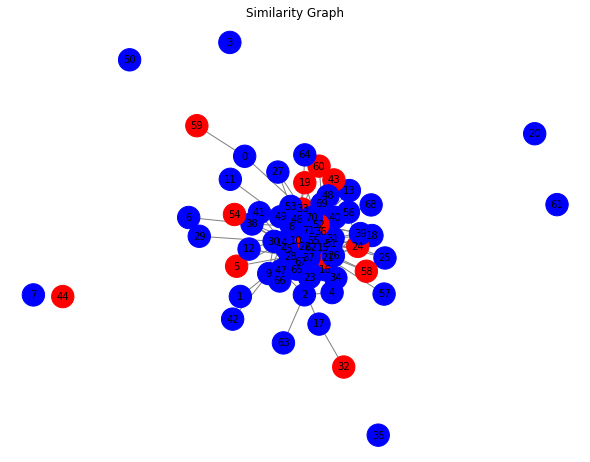

In [456]:
# Apply threshold on similarity matrix
threshold = 0.13 # good parameter
# threshold = 0.08  # Adjust the threshold as needed
similarity_matrix[similarity_matrix < threshold] = 0

# Create graph from similarity matrix
G = nx.from_numpy_matrix(similarity_matrix)

# Set node colors based on ICU values
node_colors = ['red' if filtered_df['ICU'].iloc[i] == 1 else 'blue' for i in range(filtered_df.shape[0])]

# Plot the graph
plt.figure(figsize=(8, 6))
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_color=node_colors, node_size=500, font_size=10, edge_color='gray')
plt.title("Similarity Graph")
plt.show()


In [457]:
# Create a graph object
G = nx.Graph()

# Add nodes to the graph
for i in range(latent_df.shape[0]):
    icu_value = filtered_df.iloc[i]['ICU']
    color = 'red' if icu_value == 1 else 'blue'
    G.add_node(i, color=color)

# Add edges to the graph
for i in range(latent_df.shape[0]):
    for j in range(i + 1, latent_df.shape[0]):
        if similarity_matrix[i, j] > 0:
            G.add_edge(i, j)

# Create a pyvis network
nt = Network(notebook=True)



# Add nodes and edges to the network
for node in G.nodes():
    color = G.nodes[node]['color']
    nt.add_node(node, color=color)

for edge in G.edges():
    nt.add_edge(edge[0], edge[1])

# Display the network
nt.show("graphVAE.html")


graphVAE.html
